In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import DataFunctions_greg_Copy1 as fc
from sklearn.metrics import roc_auc_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Business Case

US government has hired Data Scientists to study four key areas in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. We were  asked to predict classification for the forest cover types using forest characterists. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

Our mission is to develop a robust and high performing model that can predict the forest cover types based on certain predictor variables.
This is important to our client as they want to preserve the forest and need to be able to identify which trees they have in the forest. 

# 1. Data Cleaning 

In [4]:
df = pd.read_csv('~/Downloads/covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [12]:
df = fc.dummies_back_to_categorical(df,range(-41,-1),"Soil_Type")
df = fc.dummies_back_to_categorical(df,range(10,14),"Wilderness_Area")
df.head()

/Users/flatironschool/Desktop/Week_10/Tree-Cover-Classification-Project/DataFunctions_greg_Copy1.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i[categorical_column_name] = iteration


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2903,315,2,330,0,4734,214,237,161,4987,2,7,1
1,2906,45,1,371,6,4668,219,236,154,5007,2,7,1
2,2906,11,4,360,3,4696,216,232,153,4986,2,7,1
3,2906,0,3,330,3,4725,215,234,156,4966,2,7,1
4,2906,333,3,379,6,4658,212,235,161,4986,2,7,1


The data was mostly clean to begin with. We checked for duplicates, null values and extreme values. There were none of these, plus the categorical columns were already dummified.

# 2. EXPLORATORY DATA ANALYSIS


For the Exploratory Data Analysis for the Forest Cover Type dataset, our client has asked us to make five key findings in our data.
1. Top 3 nearest distance to hydrology (water source)
2. Top 3 cover types with the highest elvation
3. Top 3 nearest distance to Firepoint
4. Top 3 nearest distae to Roadways
5. Which soil type has the highest Elevation

## 1. Top 5 nearest distance to hydrology (water source)


In [19]:
df_covergroups_mean = df.groupby('Cover_Type').mean()
df_wilderness_area_mean = df.groupby('Wilderness_Area').mean().reset_index()

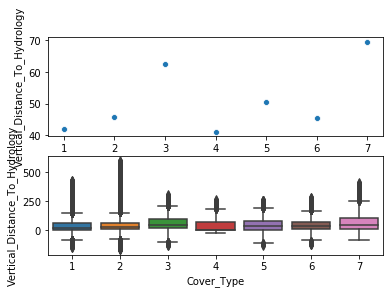

In [20]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Vertical_Distance_To_Hydrology",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Vertical_Distance_To_Hydrology",ax=axes[1])

From the two graphs, we can suggest that Cover Type 1,2,4, are the closest to hydrology in the Roosevelt National Forest.

## 2. Top 3 cover types with the highest elvation


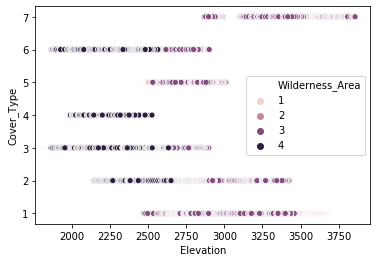

In [21]:
sns.scatterplot(data=df,hue='Wilderness_Area',y='Cover_Type',x='Elevation')

From the graph, it shows Cover Type 7,1,2, have the highest Elevation in the Roosevelt National Forest.

## 3. Top 3 cover types with nearest distance to Firepoint


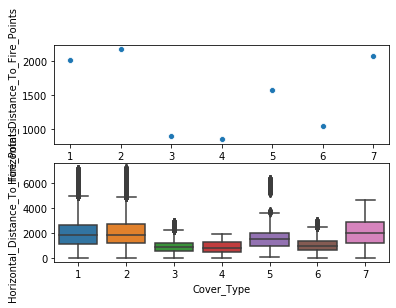

In [22]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Fire_Points",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Fire_Points",ax=axes[1])

From these graphs, it shows Cover Type 3,4,6, are the nearest to Firepoint in the Roosevelt National Forest.

## 4. Top 3 cover types with the nearest distance to Roadways

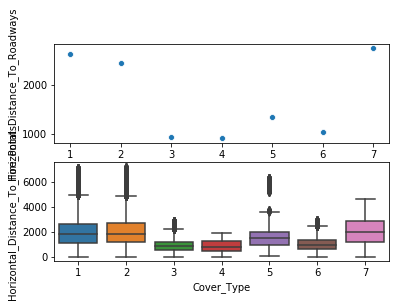

In [23]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Roadways",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Fire_Points",ax=axes[1])

From these graphs, it shows Cover Type 3,4,6, are the nearest to Roadways in the Roosevelt National Forest.

## 5. Which wilderness area has the highest Elevation

Text(0.5, 1, 'Soil_type vs Elevation - Average')

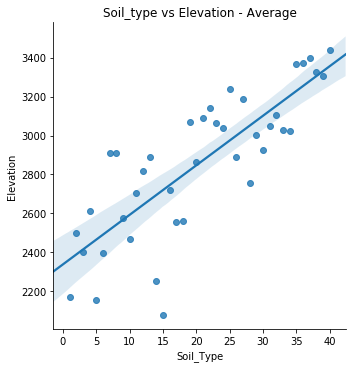

In [16]:
df_soils_mean = df.groupby("Soil_Type").mean()
df_soils_mean = df_soils_mean.reset_index()

sns.lmplot(data=df_soils_mean,x='Soil_Type',y='Elevation')
plt.title('Soil_type vs Elevation - Average')

Text(0.5, 1.0, 'Soil_type vs Elevation')

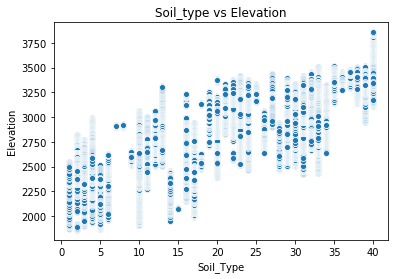

In [17]:
sns.scatterplot(data=df,x='Soil_Type',y='Elevation')
plt.title('Soil_type vs Elevation')

In [ ]:
From the two graphs, we can suggest that soil type 40 has the highest Elevation in the Roosevelt National Forest. 

# Modelling

This dataset is consists of a mix of both categorical and continuous variables. These variables describe the geology of each sample forest region, and a multiclass label (one of seven possible tree cover types) serves as our target variable.

Firstly we created a baseline line logistic model and ploted a ROC curve to see the performance of our model.
The graph below shows the ROC Curve for each curve which used One vs Rest.
Then the mirco and macro average is calulated and is plotted on the curve too.
The AUC score for mirco and maro are 0.92 and 0.93

In [26]:
y = df['Cover_Type']
X = df.loc[:, df.columns != 'Cover_Type']
list_of_classes = [1, 2, 3, 4, 5, 6, 7]


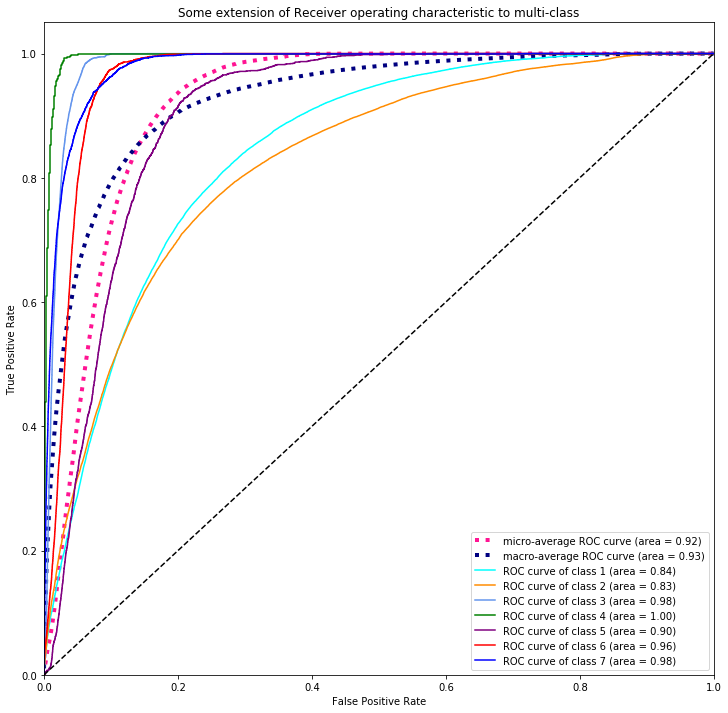

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [50]:
lr_model = LogisticRegression(fit_intercept=False,
                                 C=1e12,class_weight='balanced', solver='liblinear')
                           
-
fc.multiclass_classifier(X,y,lr_model,list_of_classes)

We then used a Decision Tree on the dataset. The criterion used was gini and because with have a class imbalance in our dataset we used 'balanced' in the class_weight function to fix this issue.
AUC score for micro and macro imporved to 0.96 and 0.95

In [27]:
dt_model  = DecisionTreeClassifier(criterion='gini', max_depth=23,class_weight='balanced' )

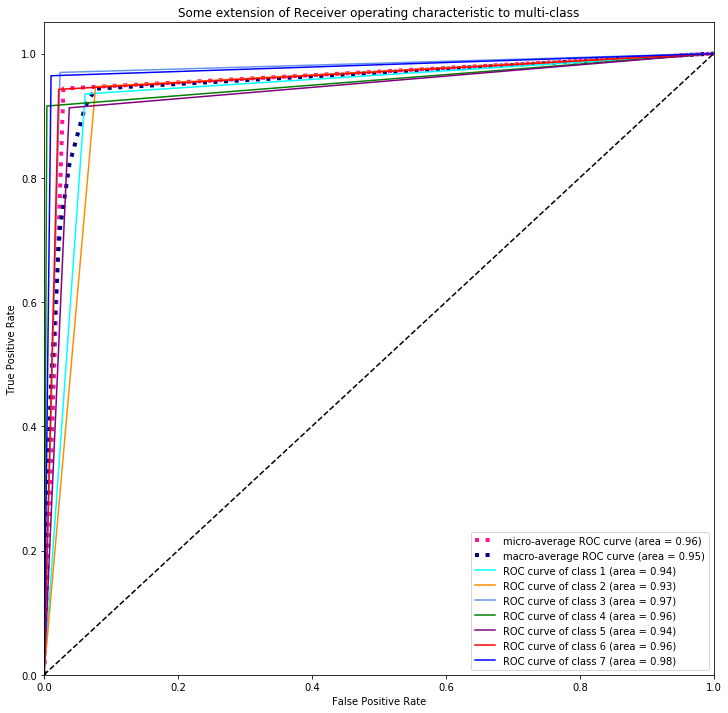

One-vs-Rest ROC AUC scores:
0.962477 (macro),
0.957426 (weighted by prevalence)


(None, None)

In [29]:
fc.multiclass_classifier_decision_tree(X,y,dt_model,list_of_classes)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

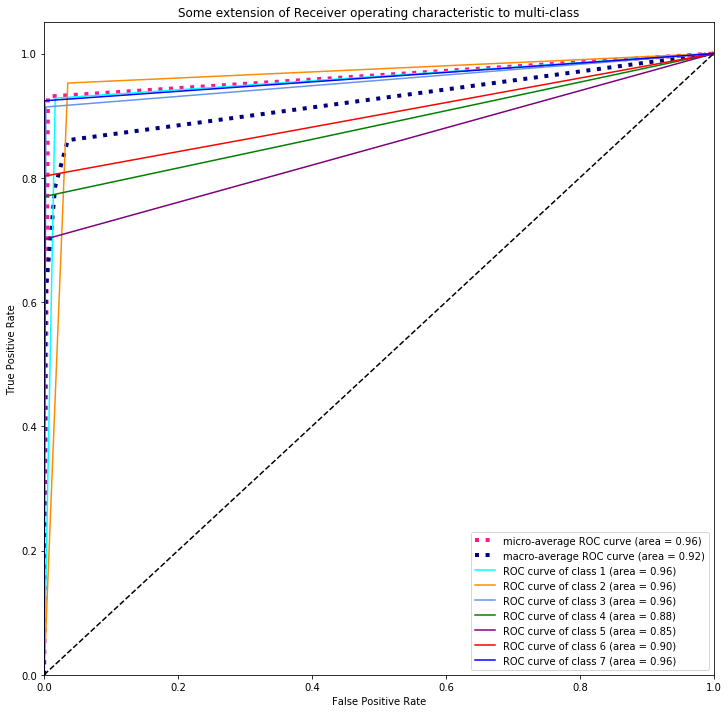

One-vs-Rest ROC AUC scores:
0.992388 (macro),
0.992607 (weighted by prevalence)


(None, None)

In [33]:
forest1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
fc.multiclass_classifier_decision_tree(X,y,forest1,list_of_classes)

We then used a Random Forest on the dataset. 'balanced' in the class_weight function is also used to fix the imbalance issue in the class.
AUC score for micro and macro imporved to 0.96 and 0.92

In [34]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,y_pred)

NameError: name 'y_test' is not defined

# Conclusion